### Developed by Ian Davis-Hoff 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions import plot_df_subplots, read_data, load_additional_data, train_var, rolling_arimax_forecast, rolling_by_dates_test
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)
from pandas.errors import SettingWithCopyWarning # Import the specific warning class

# Ignore the specific warning category
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [10]:
import glob
folder_path = "Additional Data/*.csv"
files = glob.glob(folder_path)
data_df = read_data()
data_df = load_additional_data(data_df, files)
if 'TERMCBAUTO48NS' in data_df.columns:
    data_df['TERMCBAUTO48NS'] = data_df['TERMCBAUTO48NS'].ffill()
    data_df['TERMCBAUTO48NS'] = data_df['TERMCBAUTO48NS'].bfill()

data_df['AUTOSA'] = data_df['DAUTOSA'] + data_df['FAUTOSA']
diff_df = data_df.diff().dropna()

### Inital Plotting

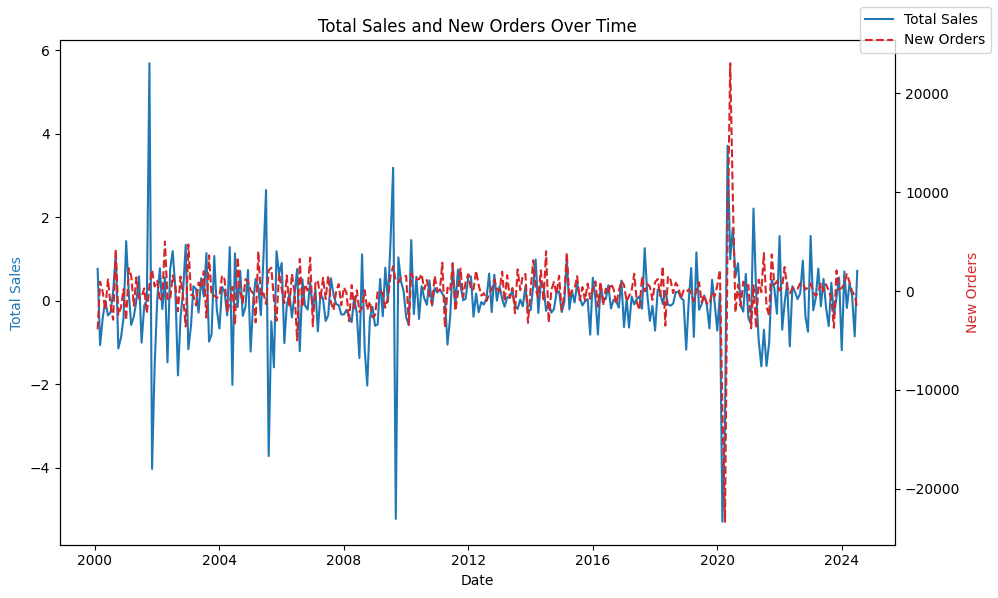

In [4]:

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-axis (Total Sales) ---
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Sales', color=color)
ax1.plot(diff_df.index, diff_df['Total Sales'], color=color, label='Total Sales')


# --- Right Y-axis (New Orders) ---
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('New Orders', color=color)
ax2.plot(diff_df.index, diff_df['New Orders'], color=color, linestyle='--', label='New Orders')


plt.title('Total Sales and New Orders Over Time')
fig.tight_layout()
fig.legend()
plt.show()


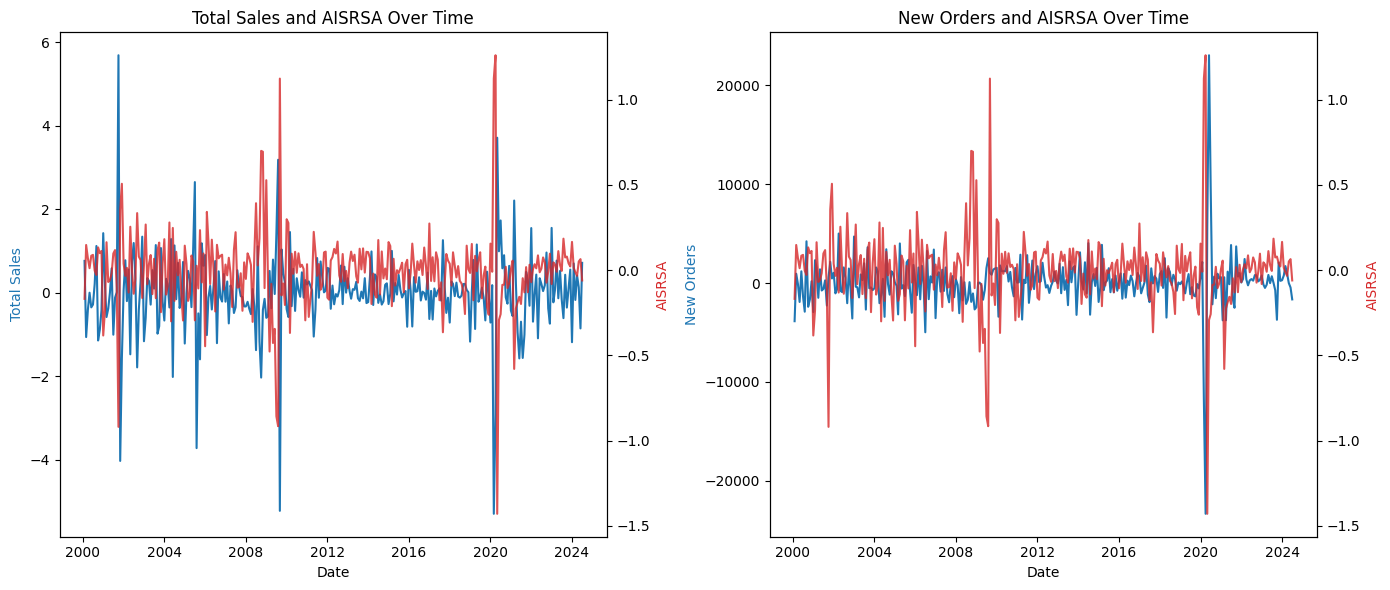

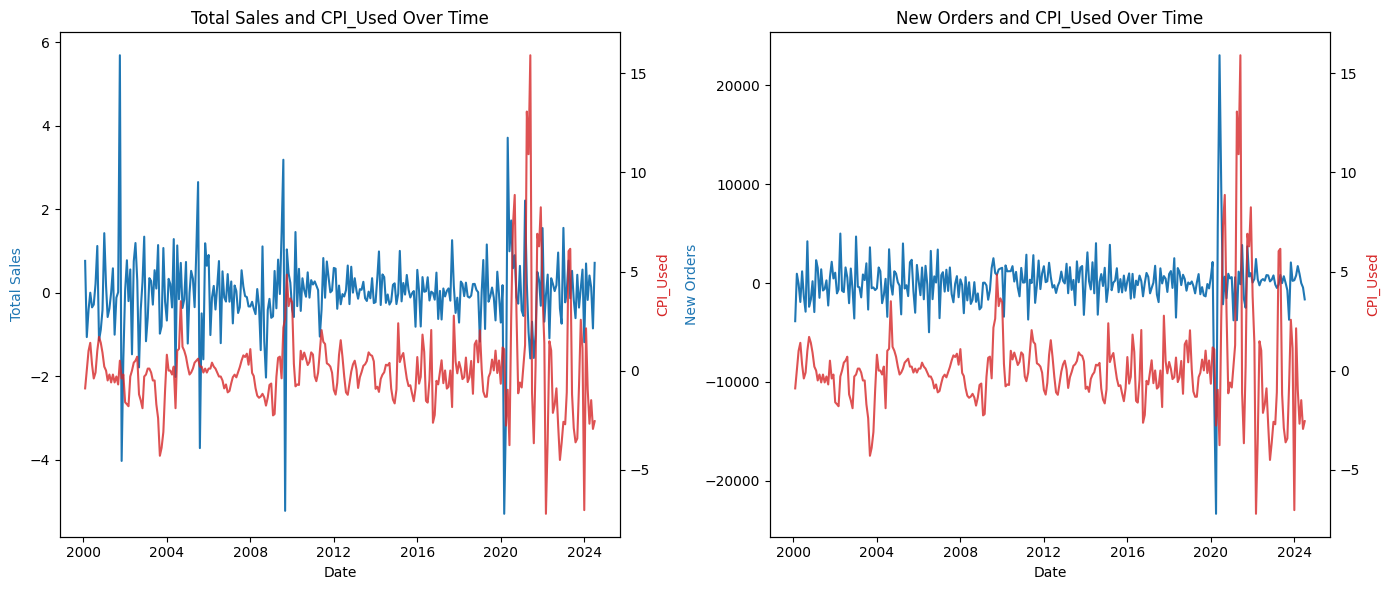

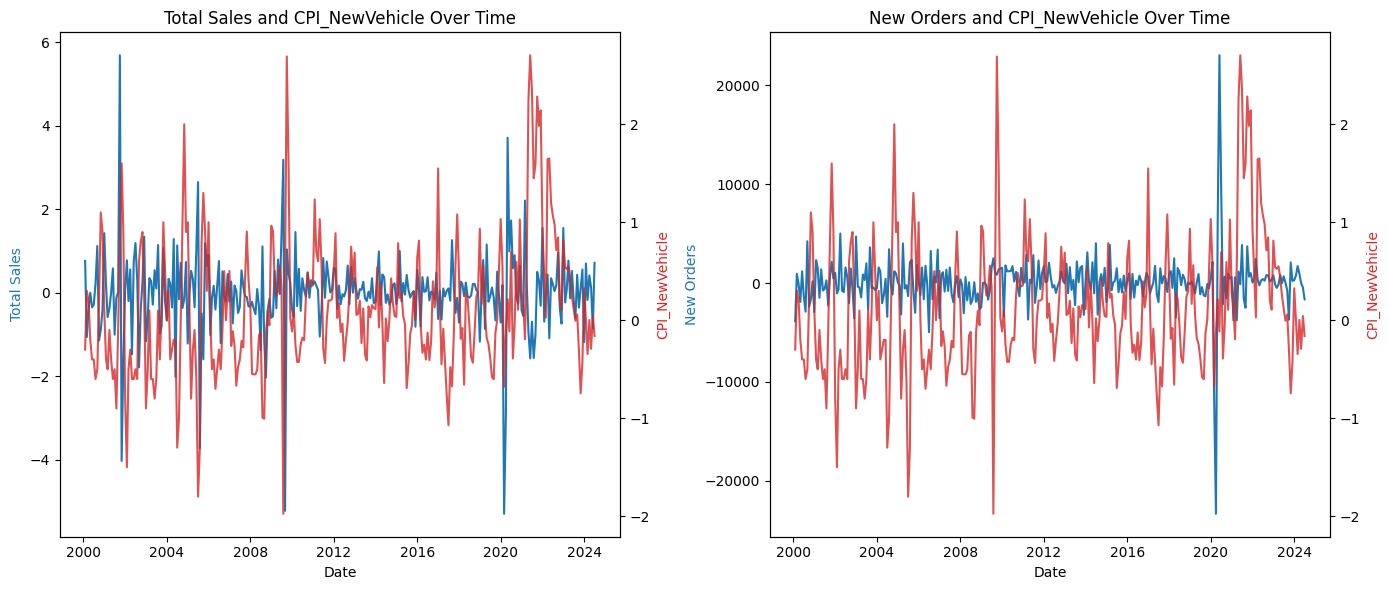

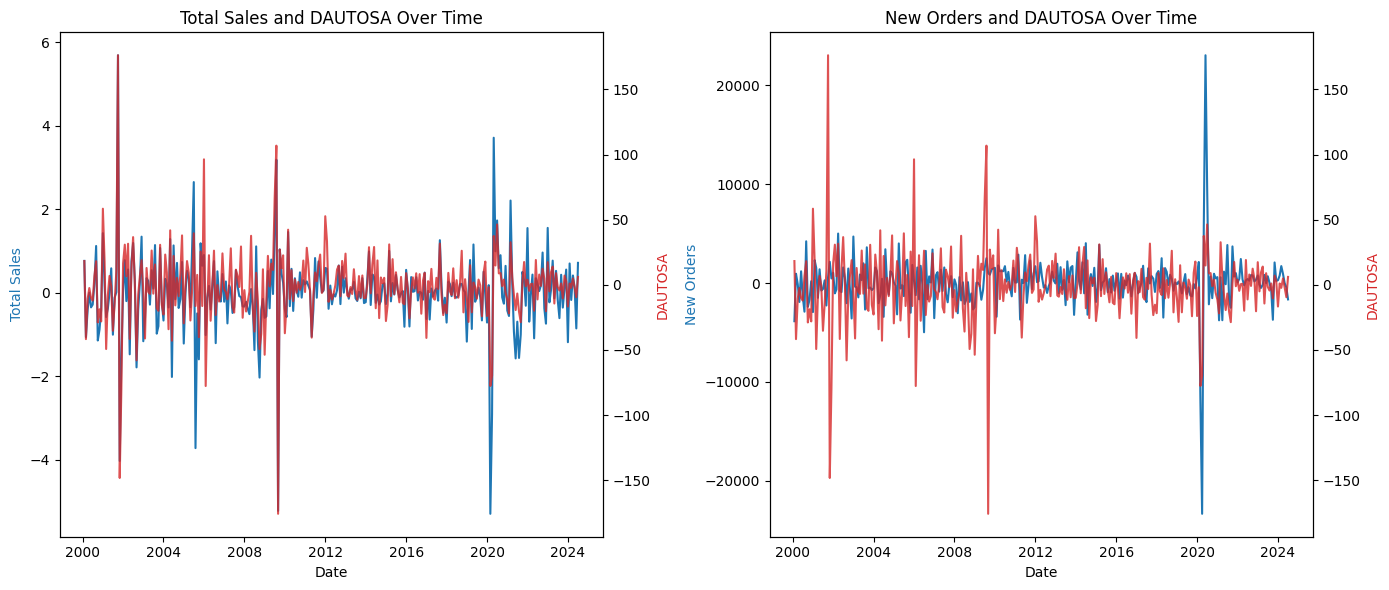

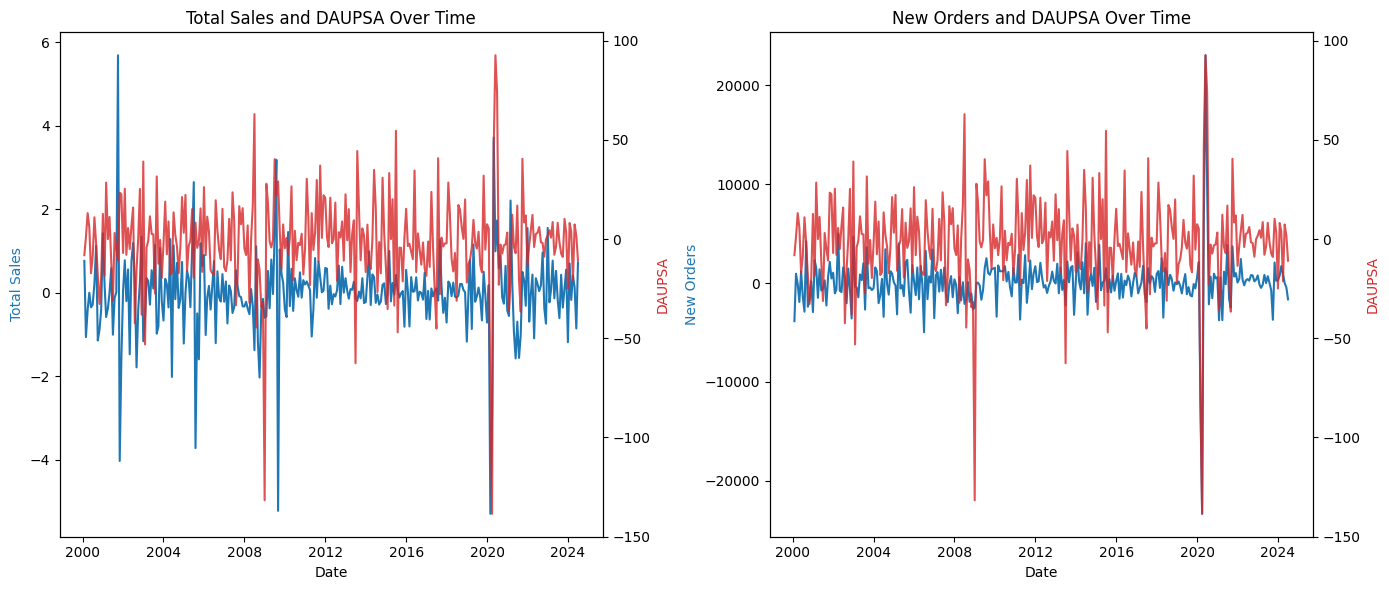

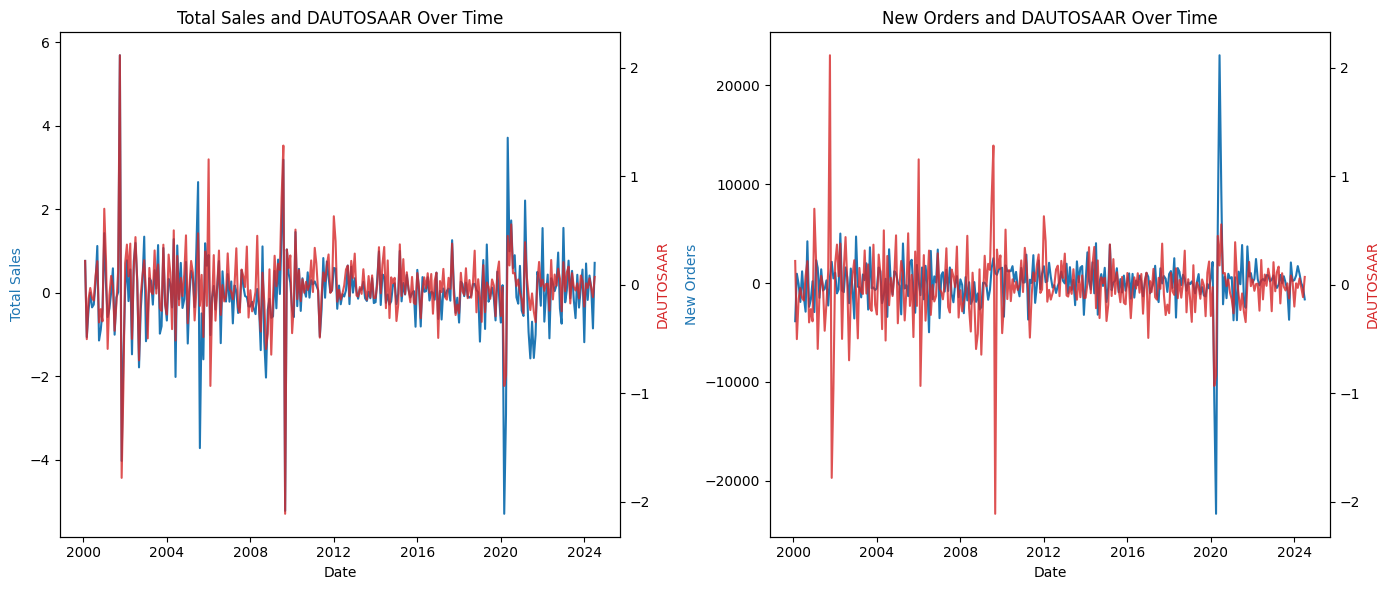

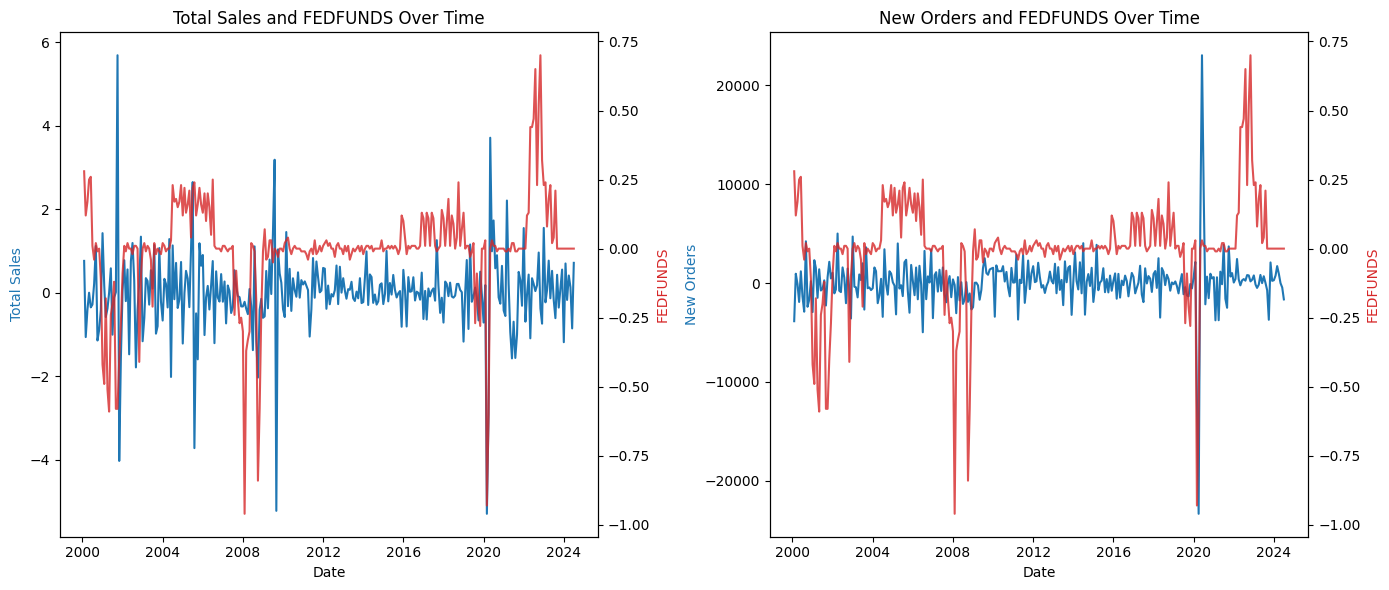

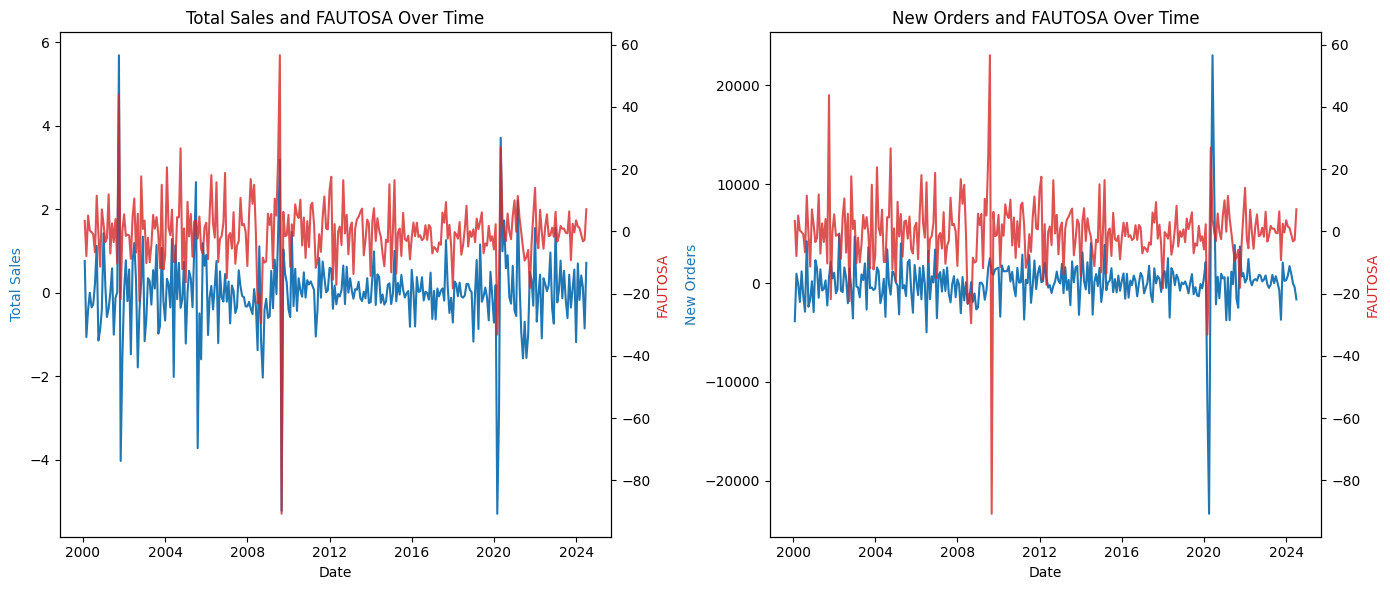

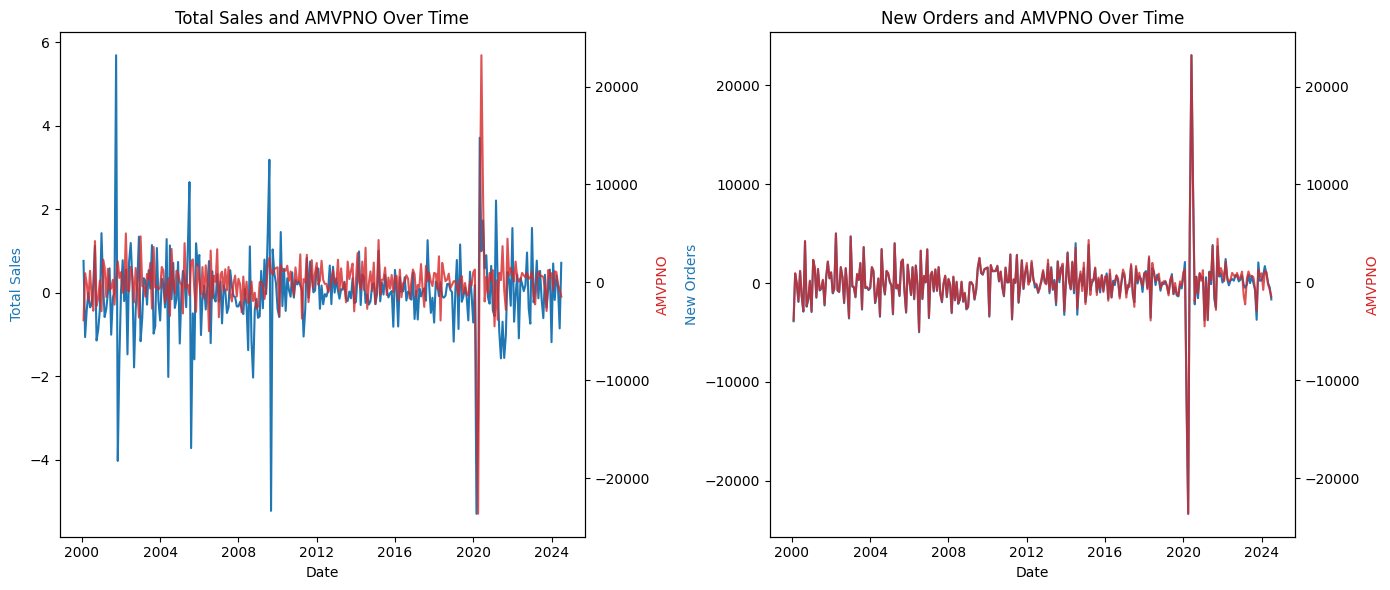

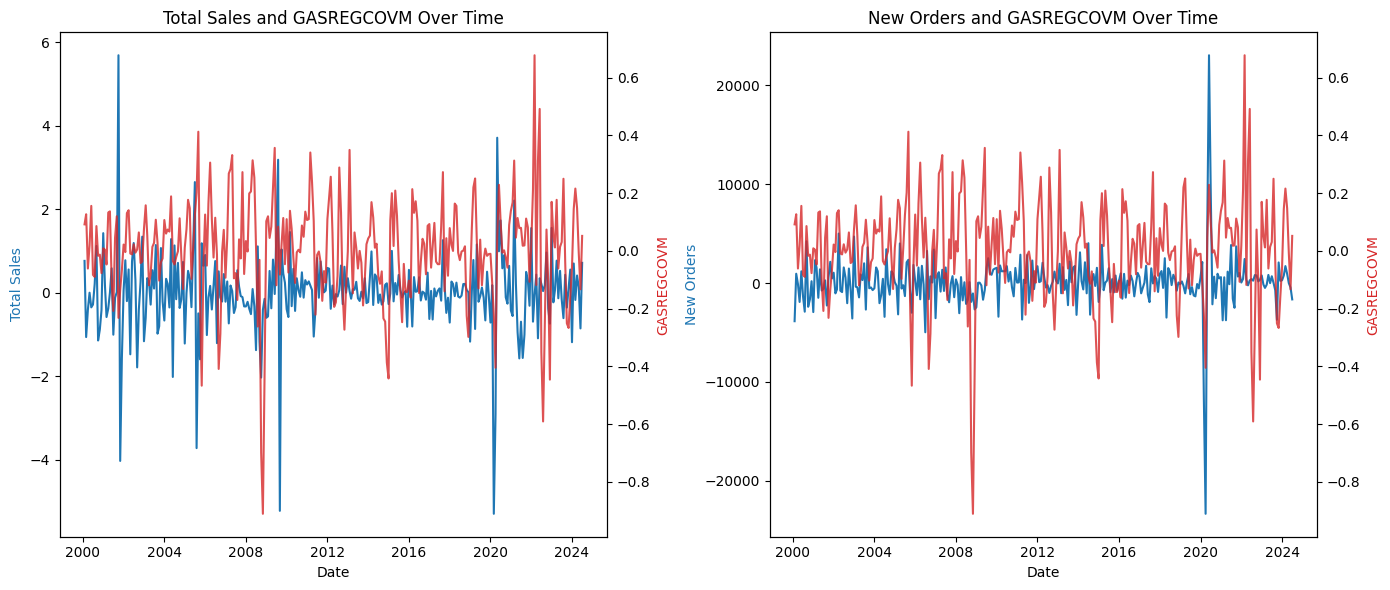

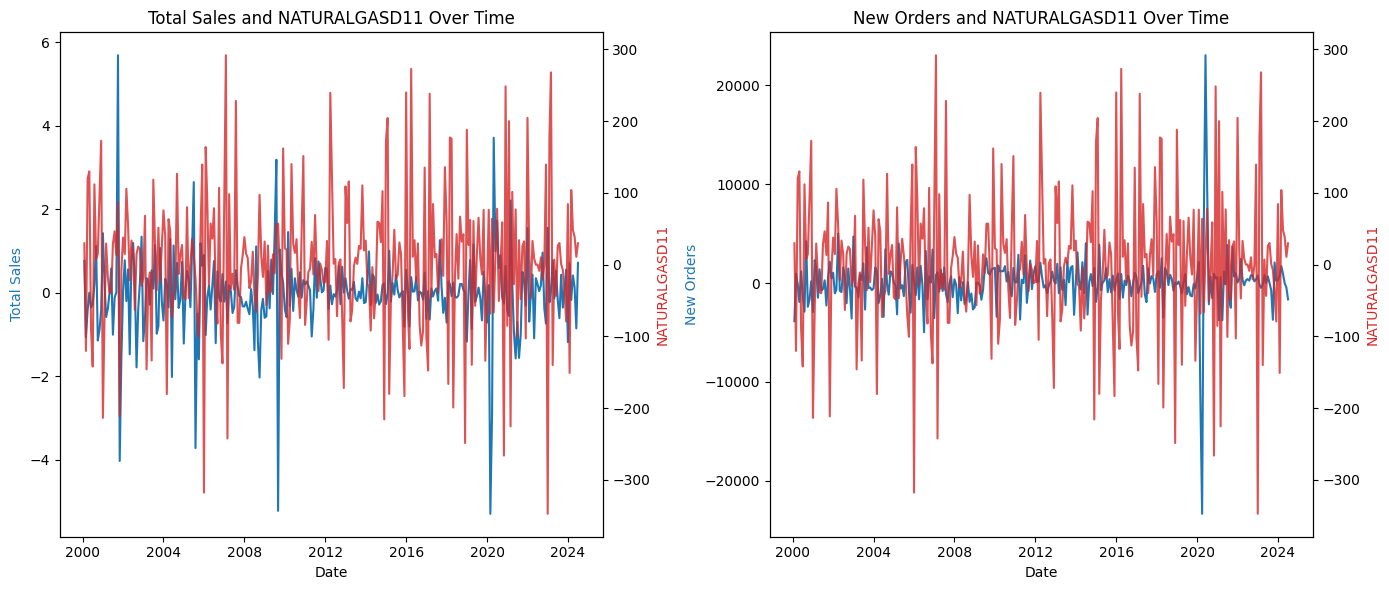

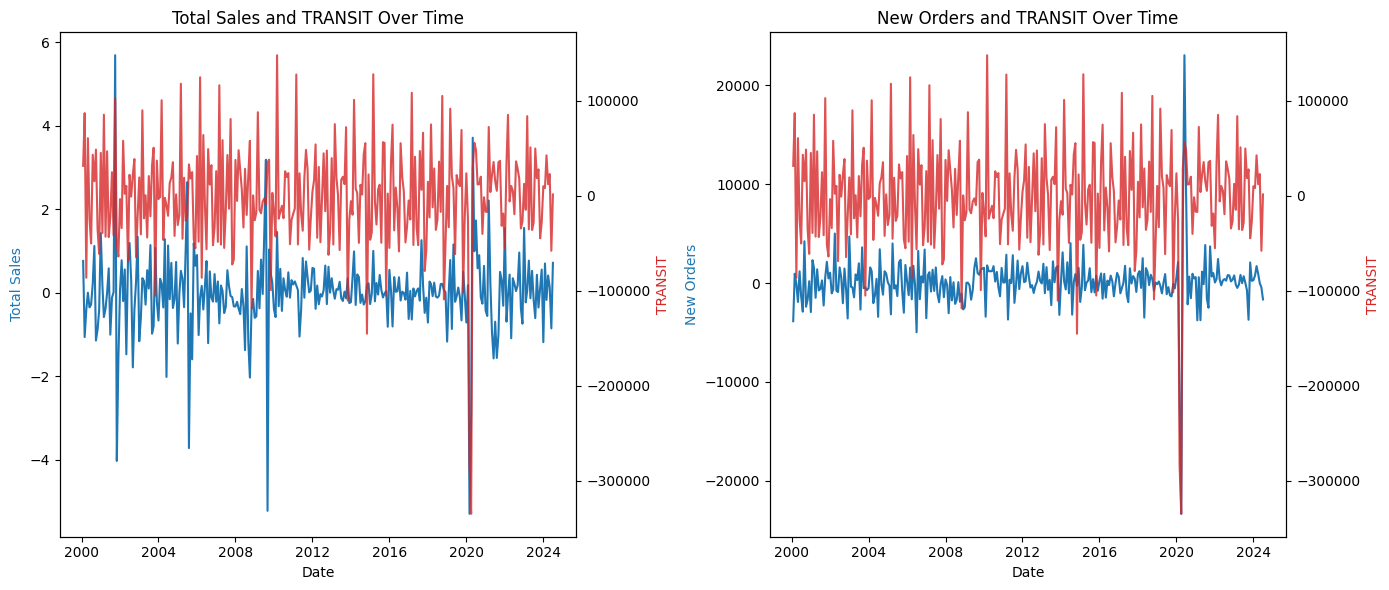

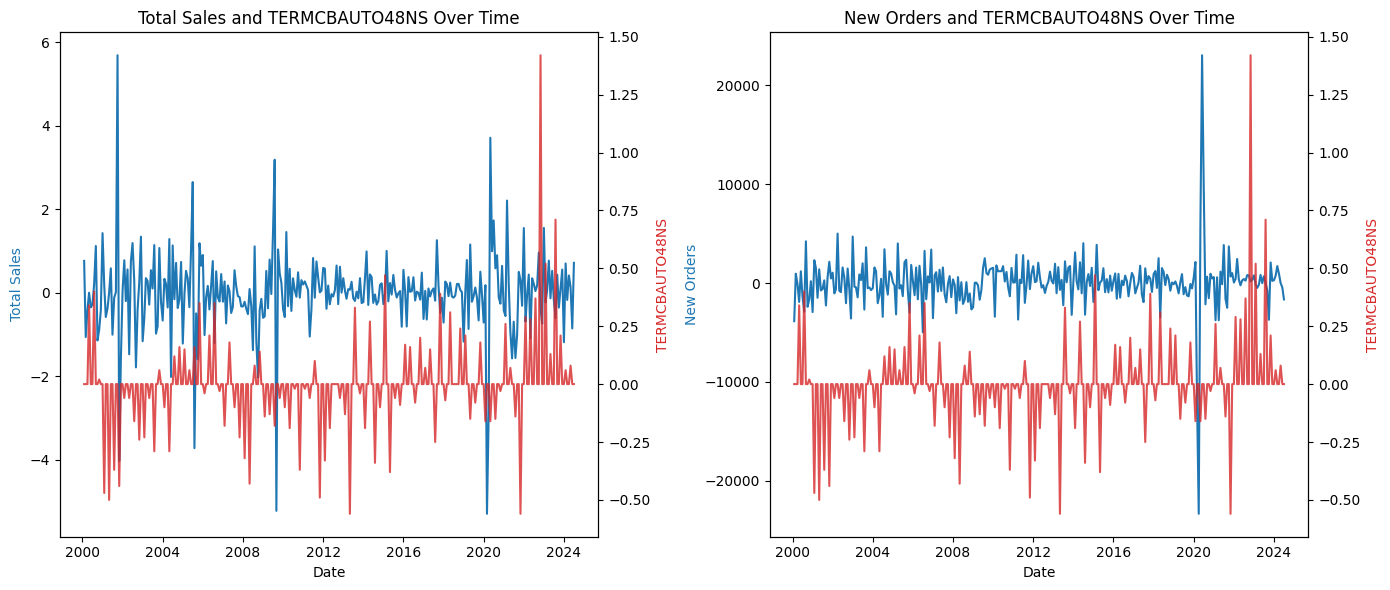

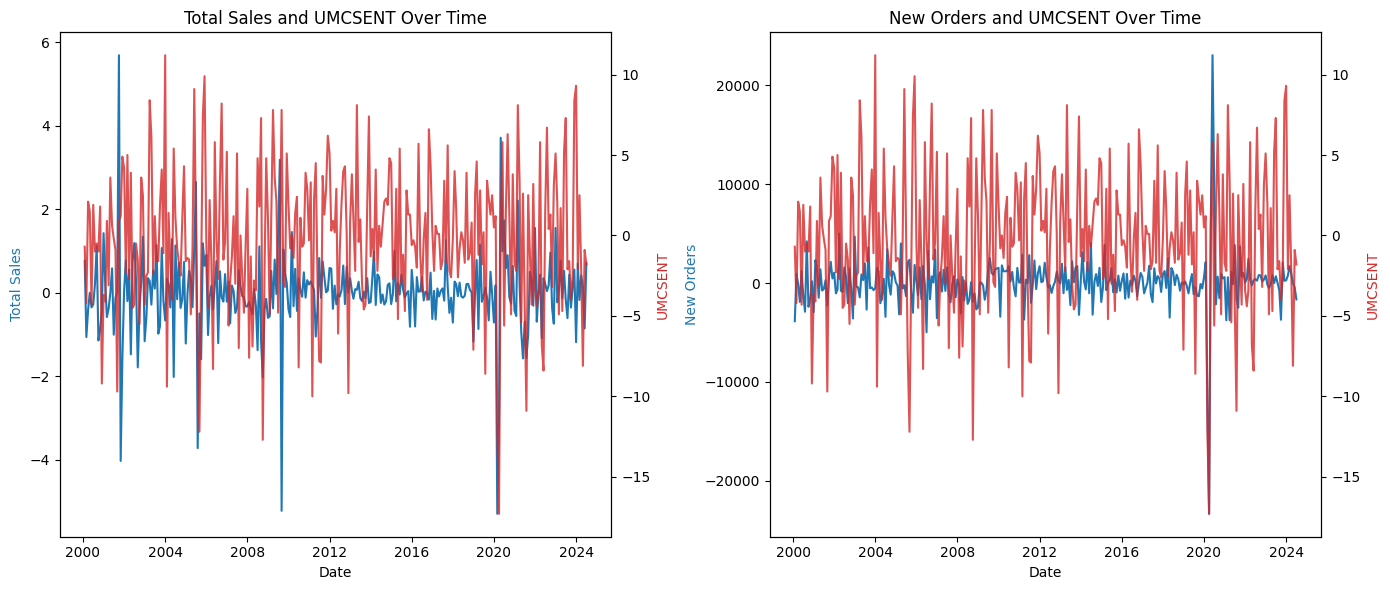

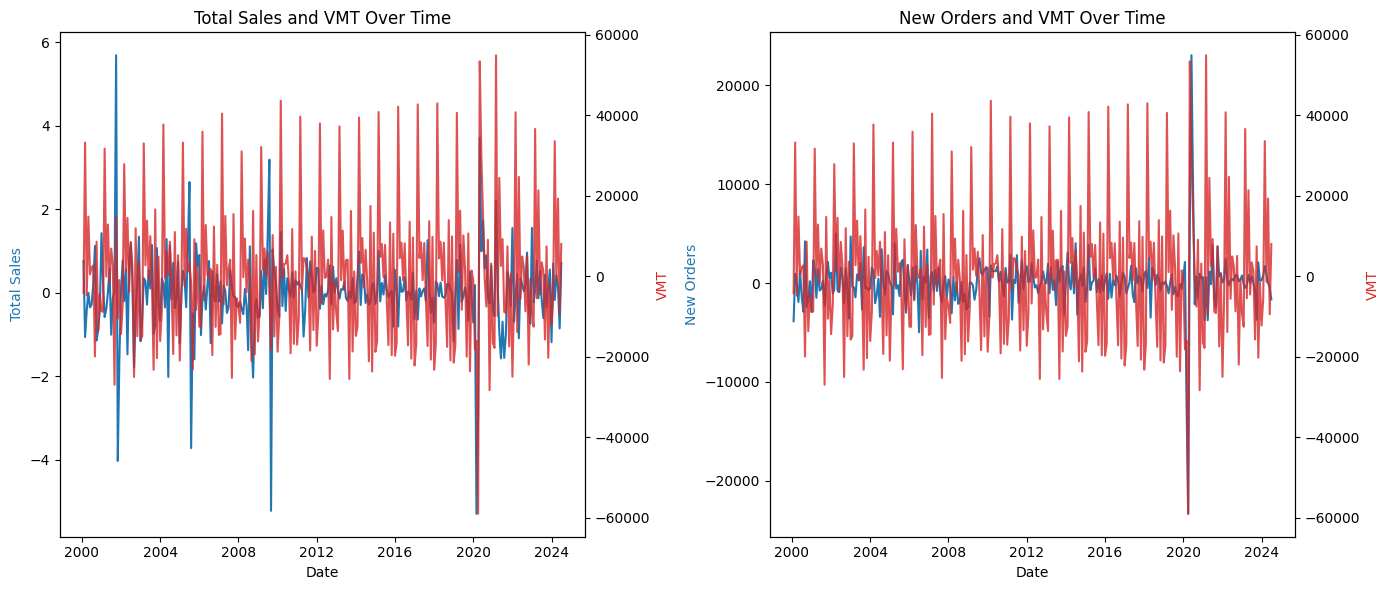

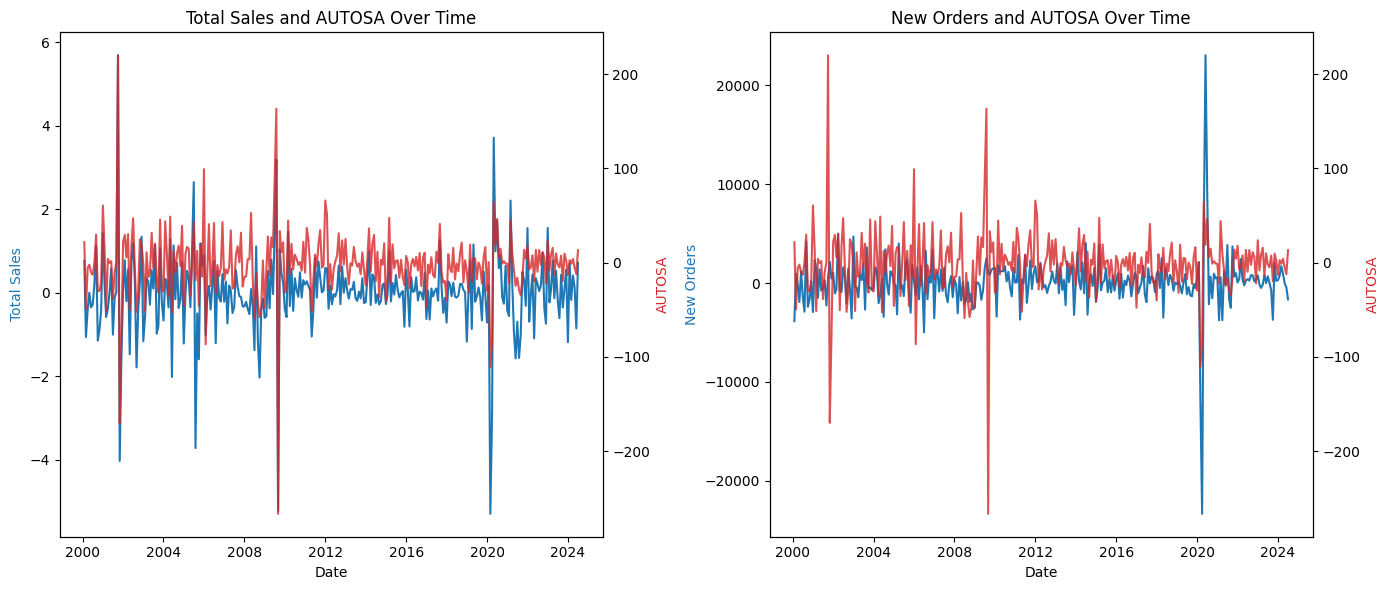

In [5]:
for col in list(diff_df.columns)[2:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    # --- Subplot 1: Total Sales ---
    ax1 = axes[0]

    # Left Y-axis (Total Sales)
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Sales', color=color)
    ax1.plot(diff_df.index, diff_df['Total Sales'], color=color, label='Total Sales')

    # Right Y-axis (quantity_col)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel(col, color=color)
    ax2.plot(diff_df.index, diff_df[col], color=color, alpha=0.8, label=col)
    ax1.set_title(f'Total Sales and {col} Over Time')

    # --- Subplot 2: New Orders ---
    ax3 = axes[1]

    
    # Left Y-axis (New Orders)
    color = 'tab:blue'
    ax3.set_xlabel('Date')
    ax3.set_ylabel('New Orders', color=color)
    ax3.plot(diff_df.index, diff_df['New Orders'], color=color, label='New Orders')

    # Right Y-axis (quantity_col)
    ax4 = ax3.twinx()
    color = 'tab:red'
    ax4.set_ylabel(col, color=color)
    ax4.plot(diff_df.index, diff_df[col], color=color, alpha=0.8, label=col)
    ax3.set_title(f'New Orders and {col} Over Time')

    # Adjust layout and add legend
    fig.tight_layout()
    plt.show()



### Granger

In [7]:
from Functions import extract_granger_results, granger_results, granger_effect_direction
granger_data = diff_df[['New Orders', 'NATURALGASD11']]

result_cols = ['Total Sales', 'New Orders']
exog_cols = [col for col in diff_df.columns if col not in result_cols]

granger_results = []
for result_col in result_cols:
    for exog_col in exog_cols:
        granger_data =diff_df[[result_col, exog_col]]
        granger_results += extract_granger_results(granger_data, 5)

granger_results_df = pd.DataFrame(granger_results)
display(granger_results_df[granger_results_df['decision']=='Reject H0 (Granger Causality)'])

C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verb

result       exog  lag       p_value                       decision
15   Total Sales    DAUTOSA    1  4.559607e-02  Reject H0 (Granger Causality)
16   Total Sales    DAUTOSA    2  4.207102e-02  Reject H0 (Granger Causality)
17   Total Sales    DAUTOSA    3  3.040235e-02  Reject H0 (Granger Causality)
18   Total Sales    DAUTOSA    4  4.615245e-02  Reject H0 (Granger Causality)
19   Total Sales    DAUTOSA    5  3.248113e-02  Reject H0 (Granger Causality)
25   Total Sales  DAUTOSAAR    1  4.535178e-02  Reject H0 (Granger Causality)
26   Total Sales  DAUTOSAAR    2  4.195274e-02  Reject H0 (Granger Causality)
27   Total Sales  DAUTOSAAR    3  3.012235e-02  Reject H0 (Granger Causality)
28   Total Sales  DAUTOSAAR    4  4.597130e-02  Reject H0 (Granger Causality)
29   Total Sales  DAUTOSAAR    5  3.235682e-02  Reject H0 (Granger Causality)
75   Total Sales     AUTOSA    1  2.102523e-02  Reject H0 (Granger Causality)
76   Total Sales     AUTOSA    2  4.316877e-02  Reject H0 (Granger Causality)
80    New Orders     AISRSA    1  1.940678e-10  Reject H0 (Granger Causality)
81    New Orders     AISRSA    2  5.863373e-08  Reject H0 (Granger Causality)
82    New Orders     AISRSA    3  4.471005e-07  Reject H0 (Granger Causality)
83    New Orders     AISRSA    4  9.110099e-07  Reject H0 (Granger Causality)
84    New Orders     AISRSA    5  2.647404e-06  Reject H0 (Granger Causality)
95    New Orders    DAUTOSA    1  6.002756e-03  Reject H0 (Granger Causality)
96    New Orders    DAUTOSA    2  1.496385e-02  Reject H0 (Granger Causality)
97    New Orders    DAUTOSA    3  2.200202e-02  Reject H0 (Granger Causality)
98    New Orders    DAUTOSA    4  3.230520e-02  Reject H0 (Granger Causality)
101   New Orders     DAUPSA    2  3.949830e-02  Reject H0 (Granger Causality)
102   New Orders     DAUPSA    3  2.593460e-02  Reject H0 (Granger Causality)
104   New Orders     DAUPSA    5  3.000995e-02  Reject H0 (Granger Causality)
105   New Orders  DAUTOSAAR    1  6.027115e-03  Reject H0 (Granger Causality)
106   New Orders  DAUTOSAAR    2  1.503514e-02  Reject H0 (Granger Causality)
107   New Orders  DAUTOSAAR    3  2.208463e-02  Reject H0 (Granger Causality)
108   New Orders  DAUTOSAAR    4  3.243434e-02  Reject H0 (Granger Causality)
110   New Orders   FEDFUNDS    1  2.499514e-03  Reject H0 (Granger Causality)
111   New Orders   FEDFUNDS    2  3.493062e-10  Reject H0 (Granger Causality)
112   New Orders   FEDFUNDS    3  9.258635e-10  Reject H0 (Granger Causality)
113   New Orders   FEDFUNDS    4  2.562841e-09  Reject H0 (Granger Causality)
114   New Orders   FEDFUNDS    5  2.786642e-09  Reject H0 (Granger Causality)
115   New Orders    FAUTOSA    1  3.098058e-02  Reject H0 (Granger Causality)
136   New Orders    TRANSIT    2  1.139008e-02  Reject H0 (Granger Causality)
137   New Orders    TRANSIT    3  2.503688e-04  Reject H0 (Granger Causality)
138   New Orders    TRANSIT    4  9.016448e-04  Reject H0 (Granger Causality)
139   New Orders    TRANSIT    5  1.608362e-03  Reject H0 (Granger Causality)
155   New Orders     AUTOSA    1  4.952868e-03  Reject H0 (Granger Causality)
156   New Orders     AUTOSA    2  1.801214e-02  Reject H0 (Granger Causality)
157   New Orders     AUTOSA    3  3.201857e-02  Reject H0 (Granger Causality)

In [8]:
causal_df =  granger_results_df[granger_results_df['decision'] == 'Reject H0 (Granger Causality)']
causal_pairs = list(zip(causal_df['exog'],causal_df['result'], causal_df['lag']))
causal_df = granger_effect_direction(diff_df, causal_pairs)
display(causal_df)

X            Y  lag                      coef direction
0     DAUTOSA  Total Sales    1   [-0.007321321700016044]  negative
1     DAUTOSA  Total Sales    2   [-0.004937097273083017]  negative
2     DAUTOSA  Total Sales    3  [-0.0010389830376012436]  negative
3     DAUTOSA  Total Sales    4    [0.000242936972431301]  positive
4     DAUTOSA  Total Sales    5   [0.0024323460925593787]  positive
5   DAUTOSAAR  Total Sales    1     [-0.6103332769695264]  negative
6   DAUTOSAAR  Total Sales    2    [-0.41142309358629575]  negative
7   DAUTOSAAR  Total Sales    3    [-0.08675261588703909]  negative
8   DAUTOSAAR  Total Sales    4    [0.020989658107877857]  positive
9   DAUTOSAAR  Total Sales    5     [0.20238680159636135]  positive
10     AUTOSA  Total Sales    1   [-0.006015770989824439]  negative
11     AUTOSA  Total Sales    2   [-0.003408923083263316]  negative
12     AISRSA   New Orders    1      [-4256.513114790318]  negative
13     AISRSA   New Orders    2       [995.3210494539578]  positive
14     AISRSA   New Orders    3      [2128.4381316049926]  positive
15     AISRSA   New Orders    4       [878.8095044434415]  positive
16     AISRSA   New Orders    5      [127.24928191164425]  positive
17    DAUTOSA   New Orders    1      [16.630980698639032]  positive
18    DAUTOSA   New Orders    2     [-3.8872949686205764]  negative
19    DAUTOSA   New Orders    3      [-7.065580518361283]  negative
20    DAUTOSA   New Orders    4      [-5.110965852390705]  negative
21     DAUPSA   New Orders    2     [-19.061133074895235]  negative
22     DAUPSA   New Orders    3     [-25.649791105100245]  negative
23     DAUPSA   New Orders    5     [-2.0520935187817844]  negative
24  DAUTOSAAR   New Orders    1        [1385.43971096424]  positive
25  DAUTOSAAR   New Orders    2     [-323.71189895247716]  negative
26  DAUTOSAAR   New Orders    3       [-589.138511943995]  negative
27  DAUTOSAAR   New Orders    4     [-425.66459470550643]  negative
28   FEDFUNDS   New Orders    1      [2802.2667564301446]  positive
29   FEDFUNDS   New Orders    2     [-1730.4061611976365]  negative
30   FEDFUNDS   New Orders    3     [-2177.4384558077254]  negative
31   FEDFUNDS   New Orders    4      [164.71920220251758]  positive
32   FEDFUNDS   New Orders    5       [1552.517743806776]  positive
33    FAUTOSA   New Orders    1       [35.55391103585143]  positive
34    TRANSIT   New Orders    2   [-0.011313573725289131]  negative
35    TRANSIT   New Orders    3   [-0.011961623377223377]  negative
36    TRANSIT   New Orders    4  [-0.0006503790697814199]  negative
37    TRANSIT   New Orders    5   [0.0012146355696795585]  positive
38     AUTOSA   New Orders    1      [13.403991180092984]  positive
39     AUTOSA   New Orders    2     [-2.3149960325722523]  negative
40     AUTOSA   New Orders    3     [-6.1440671150480215]  negative

### VAR Expirements

VAR

Selected Order: 2
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.84       15.87   7.567e+06       15.85
1        15.69       15.77   6.492e+06       15.72
2        15.55      15.69*   5.679e+06       15.61
3       15.52*       15.71  5.477e+06*      15.59*
4        15.52       15.77   5.508e+06       15.62
5        15.55       15.85   5.651e+06       15.67
6        15.57       15.92   5.763e+06       15.71
7        15.57       15.98   5.792e+06       15.74
8        15.59       16.05   5.873e+06       15.77
9        15.60       16.12   5.954e+06       15.81
10       15.59       16.16   5.884e+06       15.82
--------------------------------------------------
Base Difference VAR


RMSE         MAE
Total Sales  3.165389e-01    0.456187
New Orders   1.452277e+06  837.571654

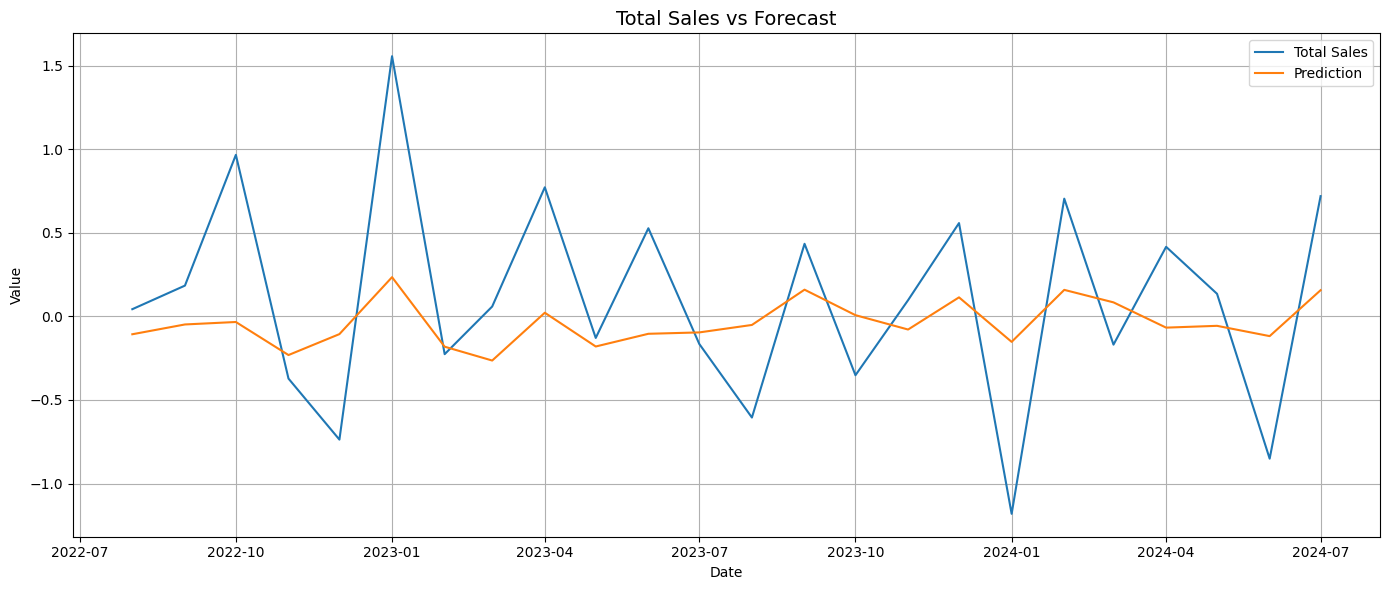

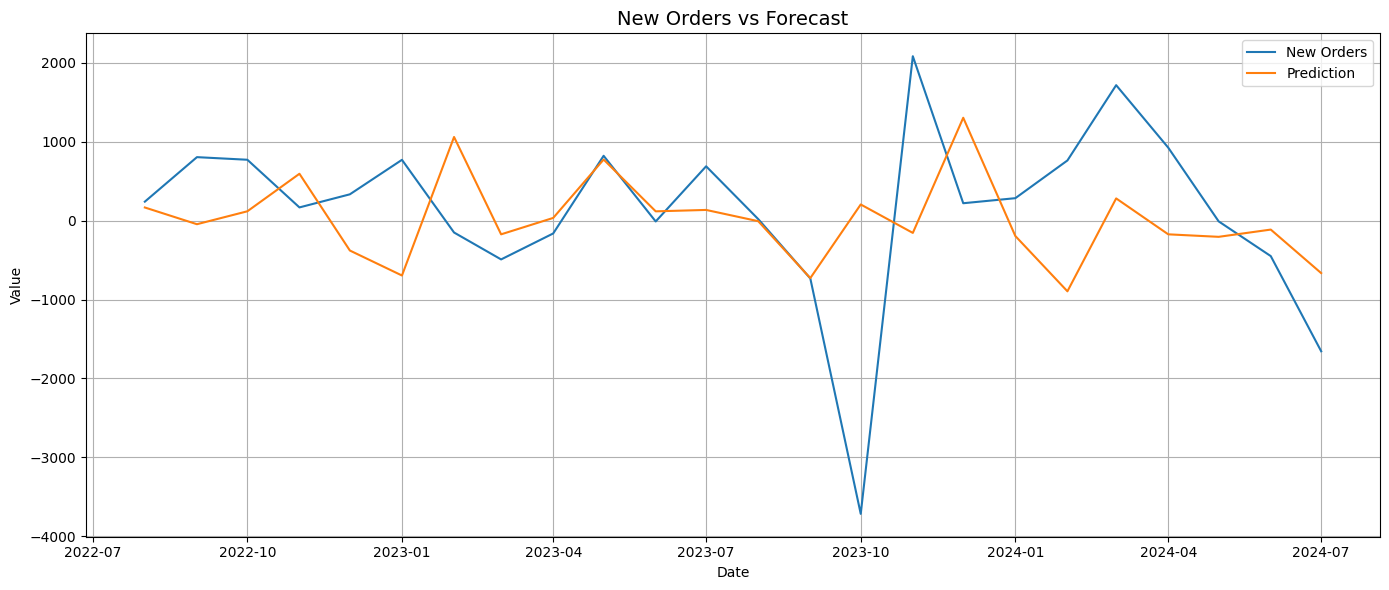

In [3]:
base_var = train_var(diff_df[['Total Sales', 'New Orders']], 24)
print('Base Difference VAR')
display(base_var['metrics'])
for col in ['Total Sales', 'New Orders']:
    df = pd.concat([base_var['actual'][col], base_var['pred'][col].rename('Prediction')], axis =1)
    plot_df_subplots(df, overlay =True, title = f'{col} vs Forecast')

Selected Order: 2
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        15.84       15.87   7.567e+06       15.85
1        15.69       15.77   6.492e+06       15.72
2        15.55      15.69*   5.679e+06       15.61
3       15.52*       15.71  5.477e+06*      15.59*
4        15.52       15.77   5.508e+06       15.62
5        15.55       15.85   5.651e+06       15.67
6        15.57       15.92   5.763e+06       15.71
7        15.57       15.98   5.792e+06       15.74
8        15.59       16.05   5.873e+06       15.77
9        15.60       16.12   5.954e+06       15.81
10       15.59       16.16   5.884e+06       15.82
--------------------------------------------------
Base Difference VAR


RMSE         MAE
Total Sales  3.165389e-01    0.456187
New Orders   1.452277e+06  837.571654

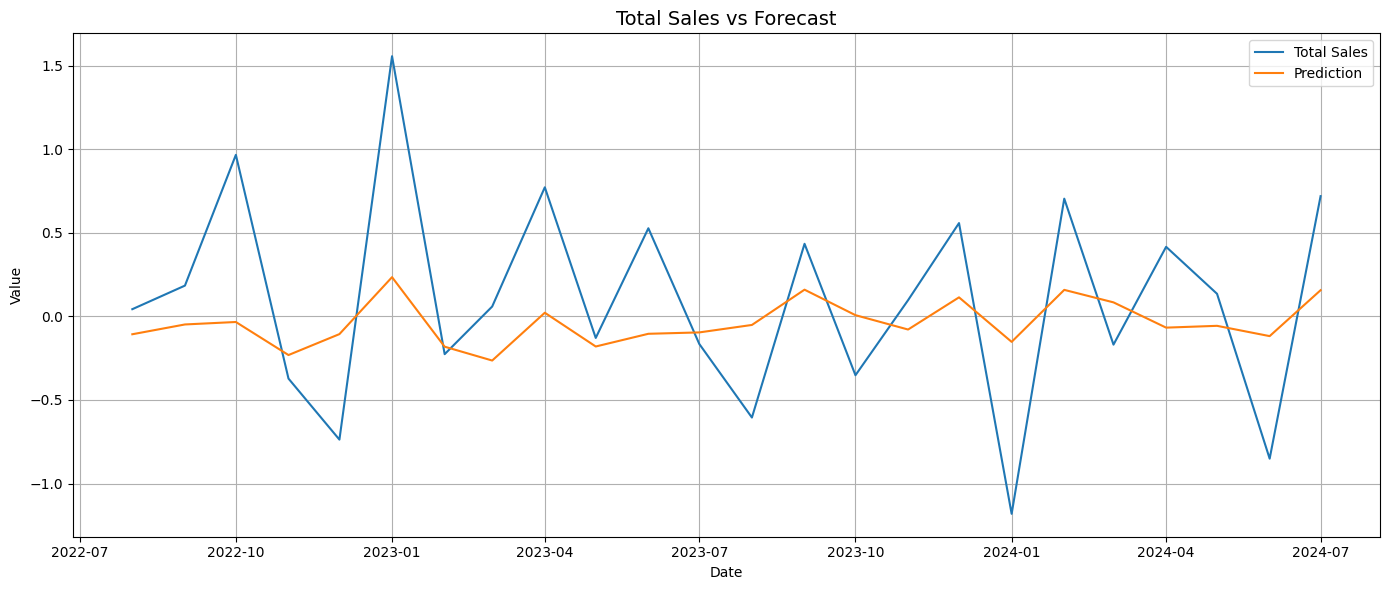

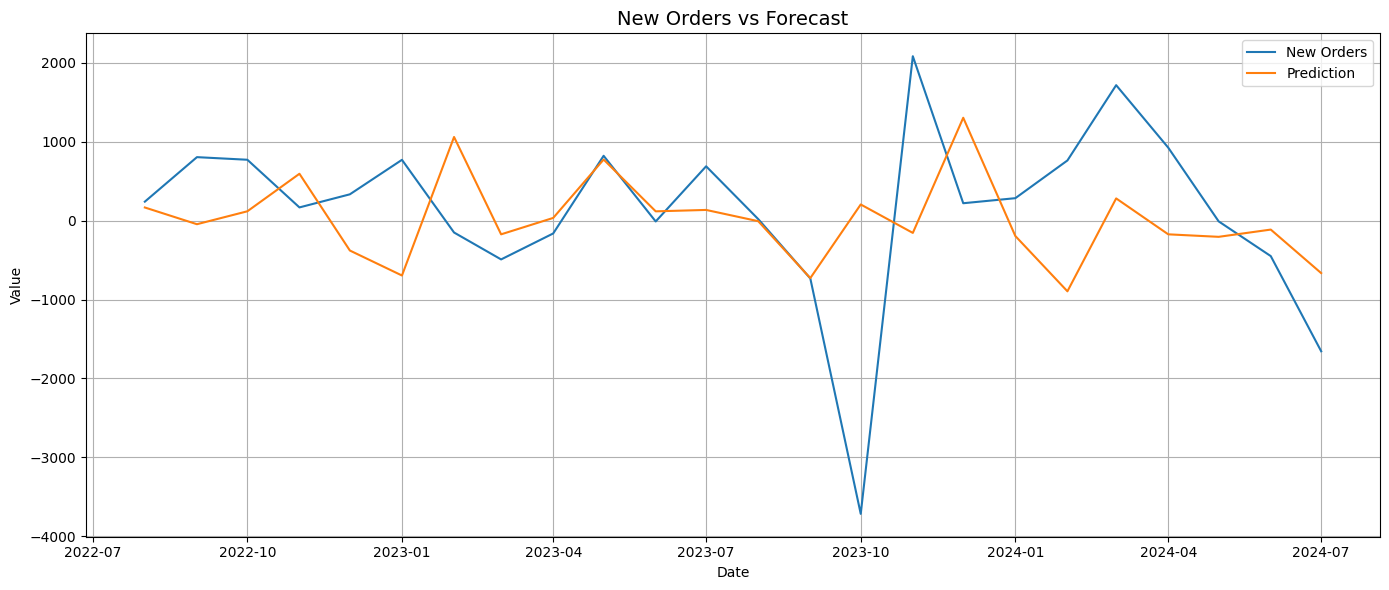

In [ ]:
base_var = train_var(diff_df[['Total Sales', 'New Orders']], 24)
print('Base Difference VAR')
display(base_var['metrics'])
for col in ['Total Sales', 'New Orders']:
    df = pd.concat([base_var['actual'][col], base_var['pred'][col].rename('Prediction')], axis =1)
    plot_df_subplots(df, overlay =True, title = f'{col} vs Forecast')

In [4]:
params = base_var['model'].params
p_val = base_var['model'].pvalues
coef_summary = pd.concat(
    [base_var['model'].params, base_var['model'].pvalues],
    axis=1,
    keys=["coef", "p_value"]
)

split_tables = {}

for eq in base_var['model'].names:   
    df_eq = coef_summary.xs(eq, level=1, axis=1)   
    split_tables[eq] = df_eq


for eq, df in split_tables.items():
    print(f"\n=== Equation: {eq} ===\n")
    print(df)



=== Equation: Total Sales ===

                    coef   p_value
L1.Total Sales -0.225889  0.000234
L1.New Orders   0.000022  0.341833
L2.Total Sales -0.192541  0.002533
L2.New Orders  -0.000009  0.679738

=== Equation: New Orders ===

                      coef       p_value
L1.Total Sales  789.294704  5.631900e-07
L1.New Orders     0.046389  4.326945e-01
L2.Total Sales  177.750991  2.779414e-01
L2.New Orders    -0.318501  5.918869e-09


VARX

0 , 0
VARMAX order (0,0) failed with error: Invalid VARMAX(p,q) specification; at least one p,q must be greater than zero.
0 , 1
0 , 2


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 , 0


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 , 1


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1 , 2


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 , 0


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 , 1


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 , 2


C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p  q          bic          aic
0  0  0          inf          inf
1  0  1  5492.804333  5438.828003
2  0  2  5475.357583  5406.987566
3  1  0  5494.489682  5440.513353
4  1  1  5511.047069  5442.677052
5  1  2  5491.581403  5408.817698
6  2  0  5523.927044  5455.557026
7  2  1  5536.901437  5454.137732
8  2  2  5536.591479  5439.434086

C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iandh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\iandh\AppData\Local\Packages

Base Difference VAR


RMSE         MAE
Total Sales  2.014526e-01    0.365206
New Orders   1.326764e+06  847.110120

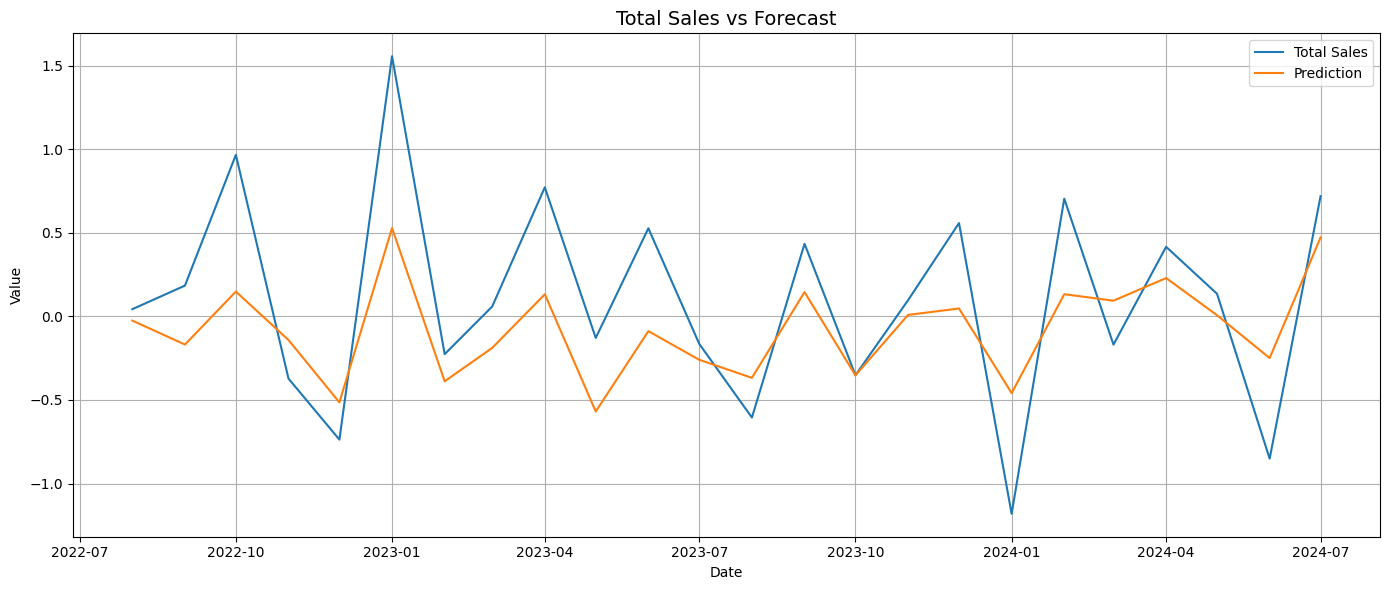

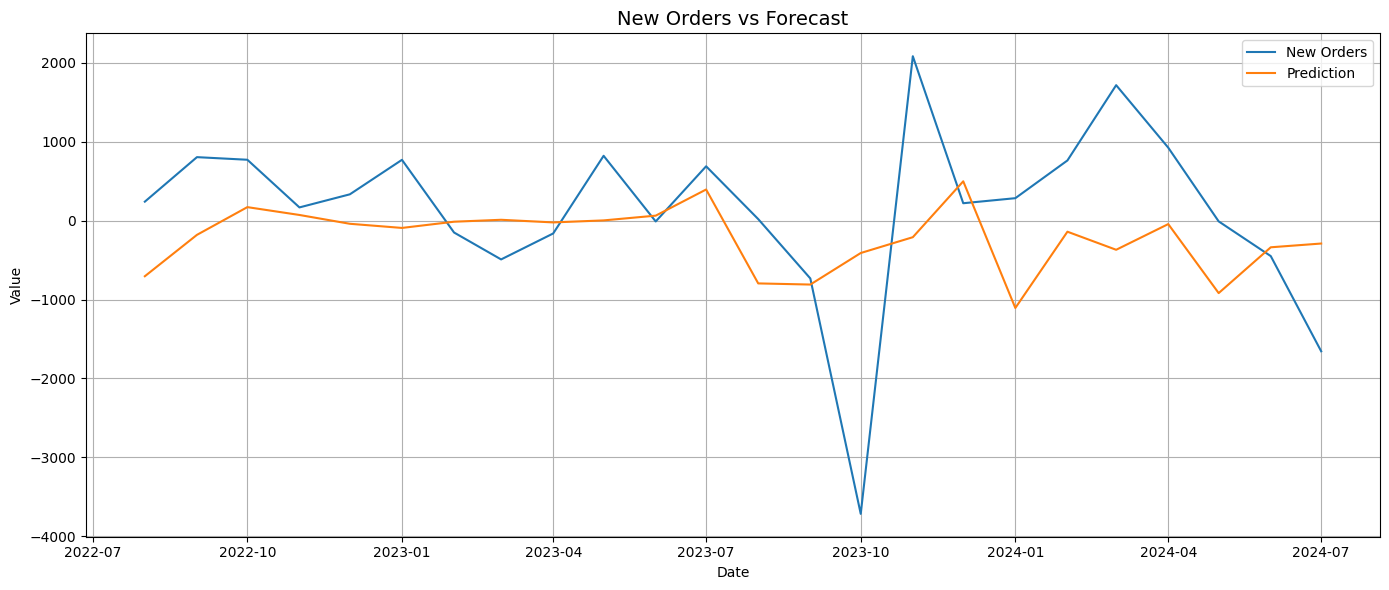

In [5]:
base_varx = train_var(diff_df[['Total Sales', 'New Orders']],  24, exog_data = diff_df[['AISRSA', 'CPI_NewVehicle', 'AUTOSA']])
print('Base Difference VAR')
display(base_varx['metrics'])
for col in ['Total Sales', 'New Orders']:
    df = pd.concat([base_varx['actual'][col], base_varx['pred'][col].rename('Prediction')], axis =1)
    plot_df_subplots(df, overlay =True, title = f'{col} vs Forecast')

In [6]:
# Extract coefficients
coeffs = base_varx['model'].params  # pandas Series with coefficient names
pvals = base_varx['model'].pvalues  # pandas Series with p-values

# Combine into a DataFrame
summary_df = pd.DataFrame({
    "name": coeffs.index,
    "coef": coeffs.values,
    "p_value": pvals.values
})

print(summary_df)

                               name         coef        p_value
0             intercept.Total Sales     0.030101   1.905209e-01
1              intercept.New Orders     4.746358   9.712906e-01
2     L1.e(Total Sales).Total Sales    -0.258430   2.335230e-08
3      L1.e(New Orders).Total Sales     0.000037   1.963417e-04
4     L2.e(Total Sales).Total Sales    -0.207595   1.759736e-05
5      L2.e(New Orders).Total Sales     0.000027   9.610285e-02
6      L1.e(Total Sales).New Orders   382.460942  2.269198e-124
7       L1.e(New Orders).New Orders    -0.069625   9.813202e-02
8      L2.e(Total Sales).New Orders   543.738478   0.000000e+00
9       L2.e(New Orders).New Orders    -0.256734   1.169569e-07
10          beta.AISRSA.Total Sales    -1.041871   2.666436e-10
11  beta.CPI_NewVehicle.Total Sales    -0.081415   1.272040e-03
12          beta.AUTOSA.Total Sales     0.016159   1.571137e-44
13           beta.AISRSA.New Orders -6359.117137   0.000000e+00
14   beta.CPI_NewVehicle.New Orders   10

### ARIMAX

#### Setup

In [7]:
cutoffs = [
    pd.to_datetime("2006-03-01"),
    pd.to_datetime("2008-03-01"),
    pd.to_datetime("2010-03-01"),
    pd.to_datetime("2012-03-01"),
    pd.to_datetime("2014-03-01"),
    pd.to_datetime("2016-03-01"),
    pd.to_datetime("2018-03-01"),
    pd.to_datetime("2020-03-01"),
    pd.to_datetime("2022-03-01"),
]


#### Total Sales Selection

Running ARIMAX with p=3...
Predicting based on 2006-03-01 00:00:00
Predicting based on 2008-03-01 00:00:00
Predicting based on 2010-03-01 00:00:00
Predicting based on 2012-03-01 00:00:00
Predicting based on 2014-03-01 00:00:00
Predicting based on 2016-03-01 00:00:00
Predicting based on 2018-03-01 00:00:00
Predicting based on 2020-03-01 00:00:00
Predicting based on 2022-03-01 00:00:00
Running ARIMAX with p=5...
Predicting based on 2006-03-01 00:00:00
Predicting based on 2008-03-01 00:00:00
Predicting based on 2010-03-01 00:00:00
Predicting based on 2012-03-01 00:00:00
Predicting based on 2014-03-01 00:00:00
Predicting based on 2016-03-01 00:00:00
Predicting based on 2018-03-01 00:00:00
Predicting based on 2020-03-01 00:00:00
Predicting based on 2022-03-01 00:00:00


MAE      RMSE
p                    
3  0.344679  0.250885
5  0.351367  0.256386

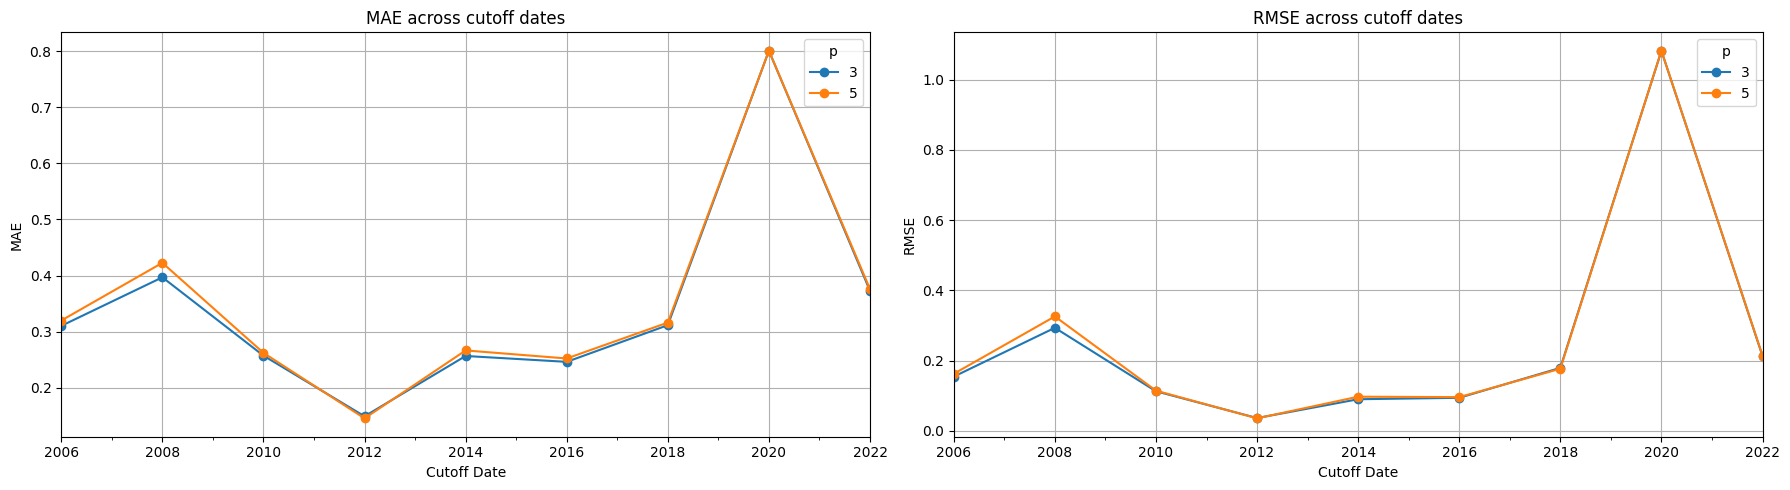

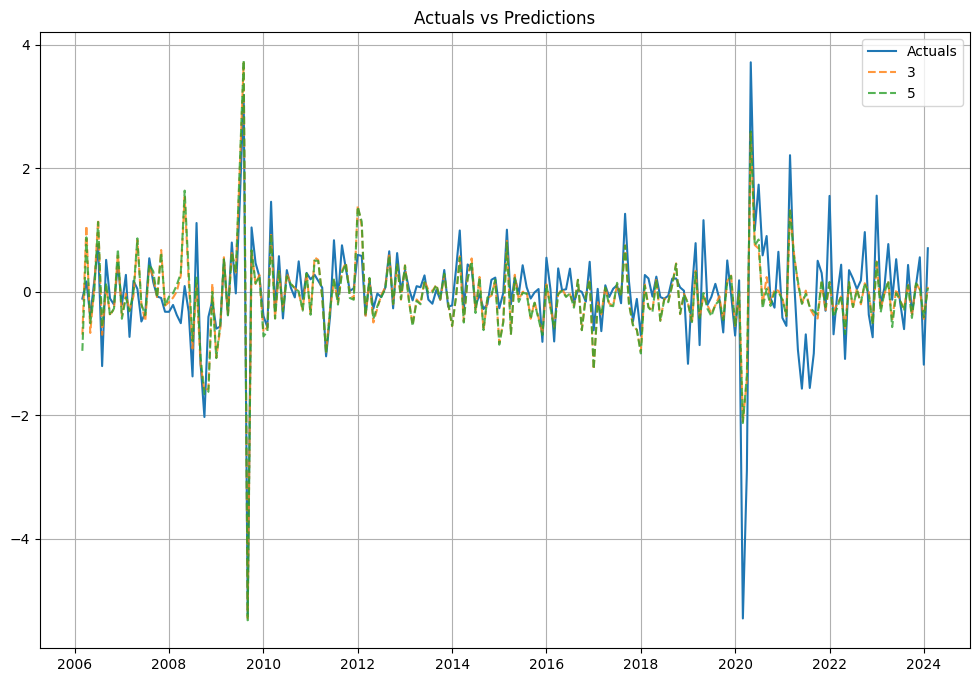

In [8]:
p_values = [3,5]
all_results = {}
all_forecasts = {}
for p in p_values:
    print(f"Running ARIMAX with p={p}...")

    results_df, forecasts, model = rolling_by_dates_test(
        y=diff_df['Total Sales'],
        exog=diff_df[['AISRSA','CPI_NewVehicle','CPI_Used','AUTOSA']],
        rolling_func=rolling_arimax_forecast,
        cutoff_dates=cutoffs,
        forecast_horizon=24,
        model_params={"p":p}
    )
    forecasts["p"] = p
    all_forecasts[p] = forecasts
    results_df["p"] = p 
    all_results[p] = results_df
combined_df = pd.concat(all_results.values(), ignore_index=False).reset_index(drop=False)

combined_forecasts = pd.DataFrame()
for key, forecast in all_forecasts.items():
    temp = pd.concat([forecast[dt] for dt in cutoffs])
    temp['p'] = key
    combined_forecasts = pd.concat([combined_forecasts, temp], ignore_index= False)

metrics = ["MAE", "RMSE"]

display(combined_df.groupby('p')[['MAE', 'RMSE']].mean())
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

for ax, metric in zip(axes, metrics):

    # Pivot so rows = cutoff_date, cols = p, values = metric
    pivot = combined_df.pivot_table(
        index="index", 
        columns="p",
        values=metric
    )

    # Plot each p as a separate line
    pivot.plot(ax=ax, marker="o")

    ax.set_title(f"{metric.upper()} across cutoff dates")
    ax.set_xlabel("Cutoff Date")
    ax.set_ylabel(metric.upper())
    ax.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
actuals = combined_forecasts[combined_forecasts["p"] == p_values[0]]
plt.plot(actuals['actuals'], label = 'Actuals')
for p in p_values:
    sub = combined_forecasts[combined_forecasts["p"] == p]
    plt.plot(sub['predictions'], label = p, alpha = 0.8, linestyle = '--')
plt.title(f"Actuals vs Predictions")
plt.legend()
plt.grid(True)
plt.show()



#### Total Sales Estimation

Predicting based on 2006-03-01 00:00:00
Predicting based on 2008-03-01 00:00:00
Predicting based on 2010-03-01 00:00:00
Predicting based on 2012-03-01 00:00:00
Predicting based on 2014-03-01 00:00:00
Predicting based on 2016-03-01 00:00:00
Predicting based on 2018-03-01 00:00:00
Predicting based on 2020-03-01 00:00:00
Predicting based on 2022-03-01 00:00:00


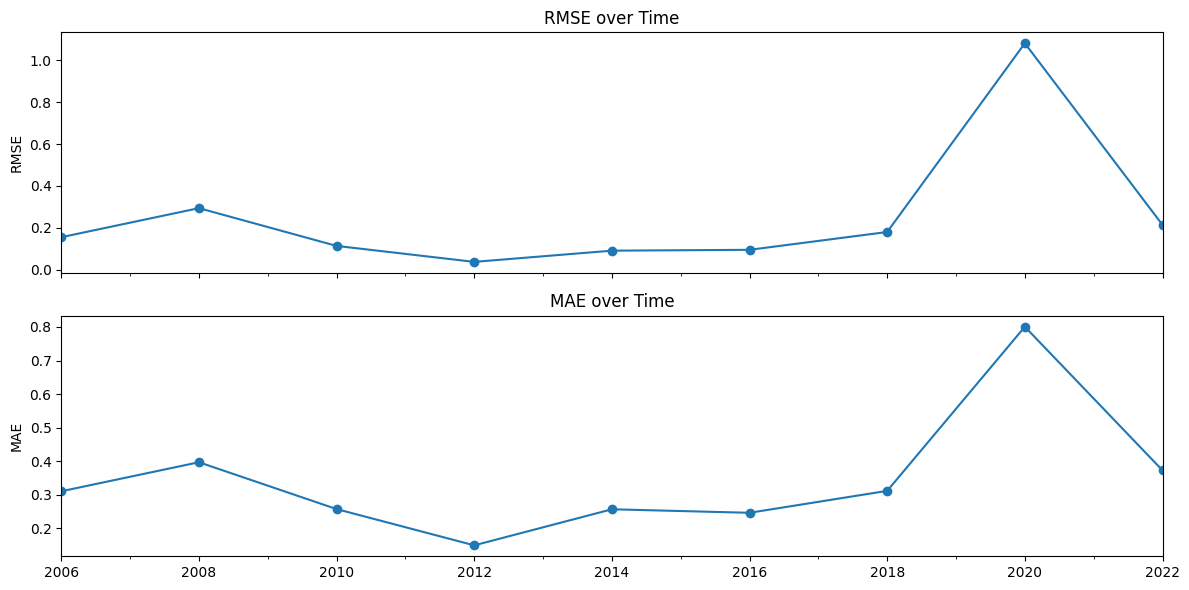

Average RMSE: 0.2508853941742486
Average MAE:  0.3446789672917107


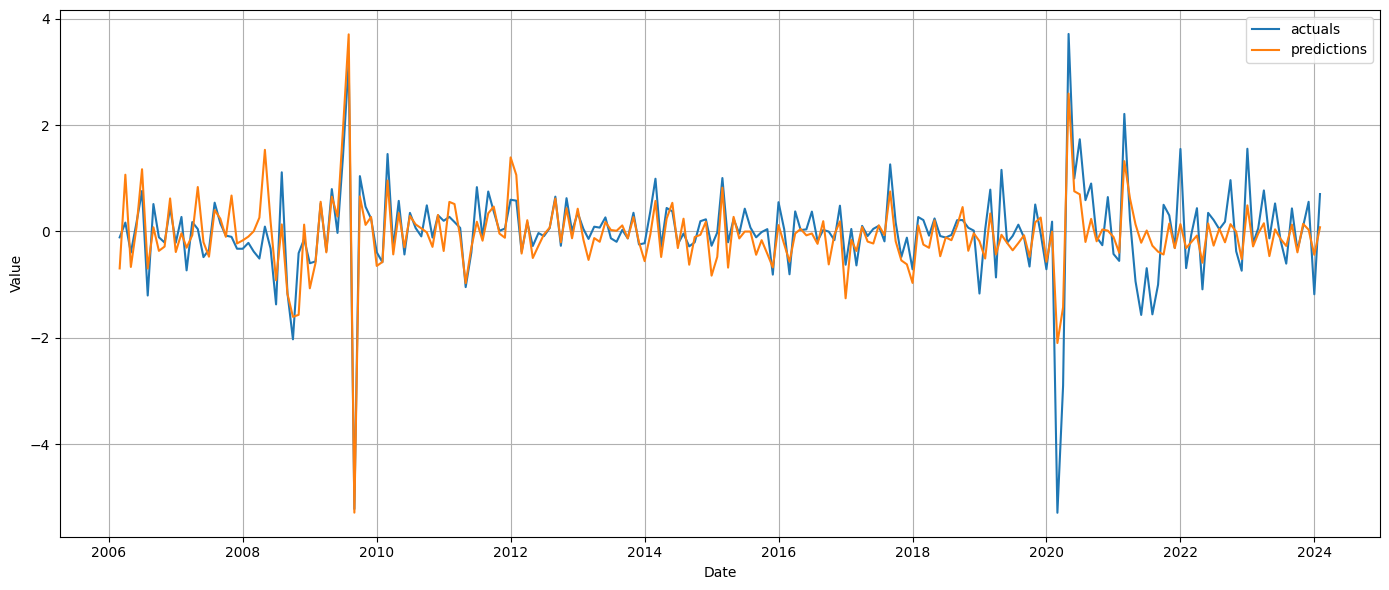

In [9]:
results_df, forecasts, model = rolling_by_dates_test(
    y=diff_df['Total Sales'],
    exog=diff_df[['AISRSA','CPI_NewVehicle','CPI_Used','AUTOSA']],
    rolling_func=rolling_arimax_forecast,
    cutoff_dates=cutoffs,
    forecast_horizon=24,
    model_params={"p":3}
)
# ---- Plot ----
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

results_df["RMSE"].plot(ax=axes[0], marker="o")
axes[0].set_title("RMSE over Time")
axes[0].set_ylabel("RMSE")

results_df["MAE"].plot(ax=axes[1], marker="o")
axes[1].set_title("MAE over Time")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# ---- Averages ----
rmse_avg = results_df["RMSE"].mean()
mae_avg  = results_df["MAE"].mean()

print("Average RMSE:", rmse_avg)
print("Average MAE: ", mae_avg)

combined_forecast = pd.concat([forecasts[dt] for dt in cutoffs])
plot_df_subplots(combined_forecast, True)

In [10]:
coeffs = model.params
pvalues = model.pvalues
summary_df = pd.DataFrame({
    "coef": model.params,
    "p_value": model.pvalues
})
display(summary_df)

coef       p_value
AISRSA         -0.810143  7.030018e-09
CPI_NewVehicle -0.065193  5.527102e-02
CPI_Used       -0.000551  9.557160e-01
AUTOSA          0.018267  1.283151e-56
ar.L1          -0.134747  2.097127e-03
ar.L2          -0.131024  3.464794e-03
ar.L3          -0.047273  3.461764e-01
sigma2          0.251734  4.980269e-84

#### New Orders Selection

In [ ]:
p_values = [3,5]
all_results = {}  # p → results_df
all_forecasts = {}
for p in p_values:
    print(f"Running ARIMAX with p={p}...")

    results_df, forecasts, model = rolling_by_dates_test(
        y=diff_df['New Orders'],
        exog=diff_df[['AISRSA']],
        rolling_func=rolling_arimax_forecast,
        cutoff_dates=cutoffs,
        forecast_horizon=24,
        model_params={"p": p}  )
    forecasts["p"] = p
    all_forecasts[p] = forecasts
    results_df["p"] = p 
    all_results[p] = results_df
combined_df = pd.concat(all_results.values(), ignore_index=False).reset_index(drop=False)

combined_forecasts = pd.DataFrame()
for key, forecast in all_forecasts.items():
    temp = pd.concat([forecast[dt] for dt in cutoffs])
    temp['p'] = key
    combined_forecasts = pd.concat([combined_forecasts, temp], ignore_index= False)

metrics = ["MAE", "RMSE"]

fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

for ax, metric in zip(axes, metrics):

    # Pivot so rows = cutoff_date, cols = p, values = metric
    pivot = combined_df.pivot_table(
        index="index", 
        columns="p",
        values=metric
    )

    # Plot each p as a separate line
    pivot.plot(ax=ax, marker="o")

    ax.set_title(f"{metric.upper()} across cutoff dates")
    ax.set_xlabel("Cutoff Date")
    ax.set_ylabel(metric.upper())
    ax.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
actuals = combined_forecasts[combined_forecasts["p"] == p_values[0]]
plt.plot(actuals['actuals'], label = 'Actuals')
for p in p_values:
    sub = combined_forecasts[combined_forecasts["p"] == p]
    plt.plot(sub['predictions'], label = p, alpha = 0.8, linestyle = '--')
plt.title(f"Actuals vs Predictions")
plt.legend()
plt.grid(True)
plt.show()
display(combined_df)

Running ARIMAX with p=3...
Predicting based on 2006-03-01 00:00:00
Predicting based on 2008-03-01 00:00:00
Predicting based on 2010-03-01 00:00:00
Predicting based on 2012-03-01 00:00:00
Predicting based on 2014-03-01 00:00:00
Predicting based on 2016-03-01 00:00:00
Predicting based on 2018-03-01 00:00:00
Predicting based on 2020-03-01 00:00:00
Predicting based on 2022-03-01 00:00:00


ValueError: too many values to unpack (expected 2)

In [ ]:
p_values = [3,5]
all_results = {}  # p → results_df
all_forecasts = {}
for p in p_values:
    print(f"Running ARIMAX with p={p}...")

    results_df, forecasts, model = rolling_by_dates_test(
        y=diff_df['New Orders'],
        exog=diff_df[['AISRSA']],
        rolling_func=rolling_arimax_forecast,
        cutoff_dates=cutoffs,
        forecast_horizon=24,
        model_params={"p": p}  )
    forecasts["p"] = p
    all_forecasts[p] = forecasts
    results_df["p"] = p 
    all_results[p] = results_df
combined_df = pd.concat(all_results.values(), ignore_index=False).reset_index(drop=False)

combined_forecasts = pd.DataFrame()
for key, forecast in all_forecasts.items():
    temp = pd.concat([forecast[dt] for dt in cutoffs])
    temp['p'] = key
    combined_forecasts = pd.concat([combined_forecasts, temp], ignore_index= False)

metrics = ["MAE", "RMSE"]

fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True)

for ax, metric in zip(axes, metrics):

    # Pivot so rows = cutoff_date, cols = p, values = metric
    pivot = combined_df.pivot_table(
        index="index", 
        columns="p",
        values=metric
    )

    # Plot each p as a separate line
    pivot.plot(ax=ax, marker="o")

    ax.set_title(f"{metric.upper()} across cutoff dates")
    ax.set_xlabel("Cutoff Date")
    ax.set_ylabel(metric.upper())
    ax.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
actuals = combined_forecasts[combined_forecasts["p"] == p_values[0]]
plt.plot(actuals['actuals'], label = 'Actuals')
for p in p_values:
    sub = combined_forecasts[combined_forecasts["p"] == p]
    plt.plot(sub['predictions'], label = p, alpha = 0.8, linestyle = '--')
plt.title(f"Actuals vs Predictions")
plt.legend()
plt.grid(True)
plt.show()
display(combined_df)

Running ARIMAX with p=3...
Predicting based on 2006-03-01 00:00:00
Predicting based on 2008-03-01 00:00:00
Predicting based on 2010-03-01 00:00:00
Predicting based on 2012-03-01 00:00:00
Predicting based on 2014-03-01 00:00:00
Predicting based on 2016-03-01 00:00:00
Predicting based on 2018-03-01 00:00:00
Predicting based on 2020-03-01 00:00:00
Predicting based on 2022-03-01 00:00:00


ValueError: too many values to unpack (expected 2)

#### New Orders Evaluation

Predicting based on 2006-03-01 00:00:00
Predicting based on 2008-03-01 00:00:00
Predicting based on 2010-03-01 00:00:00
Predicting based on 2012-03-01 00:00:00
Predicting based on 2014-03-01 00:00:00
Predicting based on 2016-03-01 00:00:00
Predicting based on 2018-03-01 00:00:00
Predicting based on 2020-03-01 00:00:00
Predicting based on 2022-03-01 00:00:00


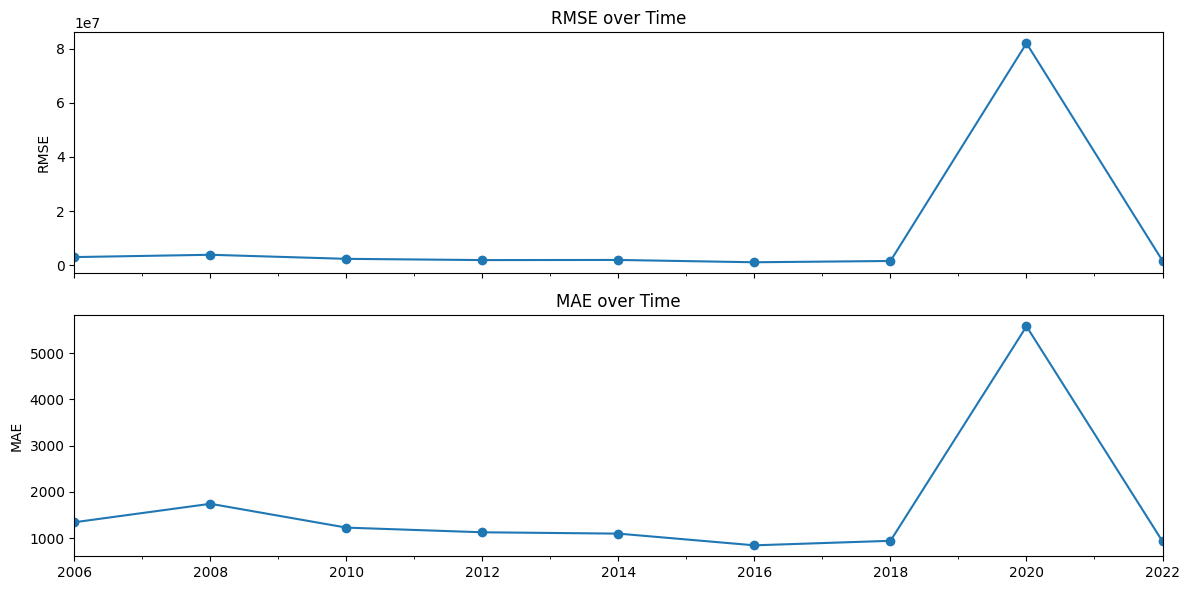

Average RMSE: 11003408.593196003
Average MAE:  1647.0268712508168


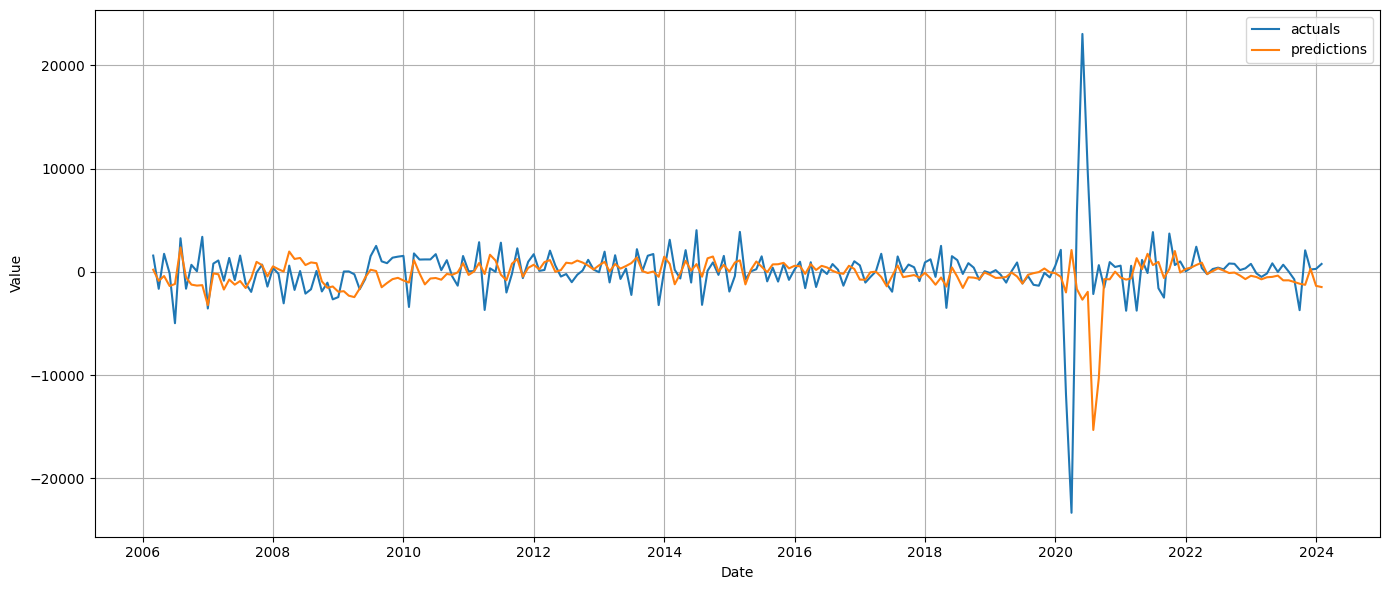

In [ ]:
results_df, forecasts, model = rolling_by_dates_test(
    y=diff_df['New Orders'],
    exog=data_df.loc[diff_df.index][['AISRSA', 'FEDFUNDS', 'AUTOSA']],
    rolling_func=rolling_arimax_forecast,
    cutoff_dates=cutoffs,
    forecast_horizon=24,
    model_params={"p": 3}  )

# ---- Plot ----
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

results_df["RMSE"].plot(ax=axes[0], marker="o")
axes[0].set_title("RMSE over Time")
axes[0].set_ylabel("RMSE")

results_df["MAE"].plot(ax=axes[1], marker="o")
axes[1].set_title("MAE over Time")
axes[1].set_ylabel("MAE")

plt.tight_layout()
plt.show()

# ---- Averages ----
rmse_avg = results_df["RMSE"].mean()
mae_avg  = results_df["MAE"].mean()

print("Average RMSE:", rmse_avg)
print("Average MAE: ", mae_avg)

combined_forecast = pd.concat([forecasts[dt] for dt in cutoffs])
plot_df_subplots(combined_forecast, True)

In [ ]:
coeffs = model.params
pvalues = model.pvalues
summary_df = pd.DataFrame({
    "coef": model.params,
    "p_value": model.pvalues
})
display(summary_df)

coef       p_value
AISRSA   -7.862559e+02  3.238465e-16
FEDFUNDS -1.579900e+02  5.196350e-02
AUTOSA    3.971586e+00  5.303911e-09
ar.L1     9.453491e-02  8.436998e-03
ar.L2    -2.876176e-01  9.399879e-20
ar.L3    -1.254975e-01  5.266622e-04
sigma2    6.243558e+06  1.955729e-69